In [547]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [548]:
## DATA preparing

In [549]:
df = pd.read_csv("./data/mpg.csv")

In [550]:
df['horsepower'].replace('a',np.nan,inplace=True)
df.dropna(subset=['horsepower'],inplace=True)
df['horsepower'] = df['horsepower'].astype('float')

In [551]:
df.dropna(subset=["weight"],inplace=True)
df.dropna(subset=["mpg"],inplace=True)

In [552]:
df.head()

mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   
5  15.0          8         429.0       198.0    4341          10.0   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  
5          70    usa           ford galaxie 500

In [553]:
mdf = df[['mpg','cylinders','horsepower','weight']]

In [554]:
# x1  , x2 , x3
x = mdf[['cylinders','horsepower','weight']]
y = mdf['mpg']

In [555]:
x.head()
y.head()

0    18.0
2    18.0
3    16.0
4    17.0
5    15.0
Name: mpg, dtype: float64

In [556]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

In [557]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(273, 3)
(273,)
(118, 3)
(118,)


In [558]:
## 다중 회귀분석
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import TweedieRegressor

In [559]:
lr = LinearRegression()
#lr = BayesianRidge()
#lr = TweedieRegressor()

In [560]:
# 학습 시작
lr.fit(x_train, y_train)

LinearRegression()

In [561]:
r_square = lr.score(x_test,y_test)
print(r_square)

0.697133093498013


In [562]:
print(lr.coef_, lr.intercept_)

[-0.35370559 -0.04381465 -0.00510947] 45.191372321572885


In [563]:
y_hat = lr.predict(x_test)

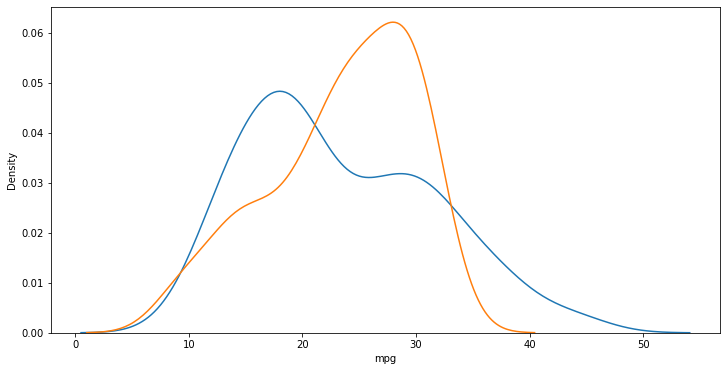

In [564]:
plt.figure(figsize=(12,6))
ax1 = sns.distplot(y_test,hist=False, label = 'y_test')
ax2 = sns.distplot(y_hat, hist = False, label="y_hat", ax=ax1)
plt.show()